# **PROJET NLP 2023 : Détection de contenu toxique**


---





## IMPORTS bib

In [ ]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH_model = "/content/gdrive/Shareddrives/Projet_NLP_2023/modelBERT/modelBERT.pt"

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **DATA IMPORTS**

In [ ]:
file_path = '/content/gdrive/Shareddrives/Projet_NLP_2023/train.csv'
train_df = pd.read_csv(file_path,index_col=None)

# Affichage du contenu du fichier CSV
print(train_df.head())  # Afficher les premières lignes du fichier CSV

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


In [ ]:
file_path = '/content/gdrive/Shareddrives/Projet_NLP_2023/test.csv'
test_df = pd.read_csv(file_path,index_col=None)
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


# **DATA EXPLORATION**

In [ ]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [ ]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
len(train_df[train_df['toxic'] == 1]['toxic'])

15294

In [ ]:
train_df.keys()

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
labels = train_df.keys().tolist()[2:]
labels

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
list_nb_toxic = []
for key in labels:
  list_nb_toxic.append(len(train_df[train_df[key] == 1][key]))

In [ ]:
list_nb_positive = []
for key in labels:
  list_nb_positive.append(len(train_df[train_df[key] == 0][key]))

In [ ]:
print(list_nb_toxic)

[15294, 1595, 8449, 478, 7877, 1405]


In [ ]:
print(list_nb_positive)

[144277, 157976, 151122, 159093, 151694, 158166]


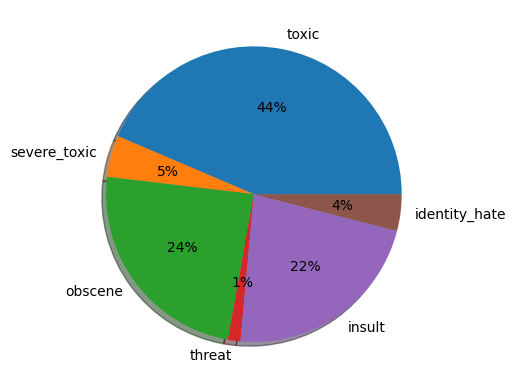

In [ ]:
plt.pie(list_nb_toxic, labels=labels,autopct='%.0f%%',shadow=True)
plt.show()

**On note une grosse hétérogeneité au niveau des data de commentaires négatifs**

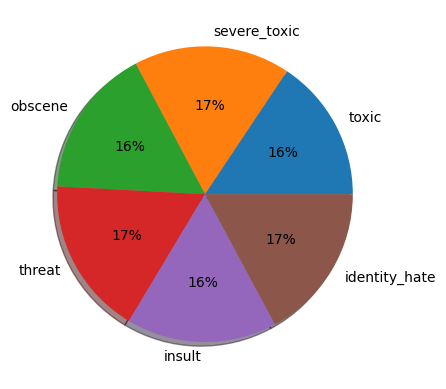

In [ ]:
plt.pie(list_nb_positive, labels=labels, autopct='%.0f%%',shadow=True)
plt.show()

# **DATA PREPROCESSING**

In [ ]:
import re
from sklearn.model_selection import train_test_split

In [ ]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Insert spaces between certain patterns (e.g., "ie", "eg")
    text = re.sub(r'(\s)([iI][eE]|[eE][gG])(\s)', r' \2 ', text)

    # Remove extra white spaces
    text = " ".join(text.split())

    return text.lower()

In [ ]:
train_df['cleaned_comment'] = train_df['comment_text'].apply(clean_text)
train_df['cleaned_comment'].head()

0    explanation why the edits made under my userna...
1    d aww he matches this background colour i m se...
2    hey man i m really not trying to edit war it s...
3    more i can t make any real suggestions on impr...
4    you sir are my hero any chance you remember wh...
Name: cleaned_comment, dtype: object

In [ ]:
test_df['cleaned_comment'] = test_df['comment_text'].apply(clean_text)
test_df

,id,comment_text,cleaned_comment
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,yo bitch ja rule is more succesful then you ll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,from rfc the title is fine as it is imo
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",sources zawe ashton on lapland
3,00017563c3f7919a,":If you have a look back at the source, the in...",if you have a look back at the source the info...
4,00017695ad8997eb,I don't anonymously edit articles at all.,i don t anonymously edit articles at all
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",i totally agree this stuff is nothing but too ...
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,throw from out field to home plate does it get...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",okinotorishima categories i see your changes a...
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",one of the founding nations of the eu germany ...


In [ ]:
 Train_texts, Test_texts, Train_labels, Test_labels = train_test_split(
    train_df["cleaned_comment"], train_df[labels].values, test_size=0.3, random_state=50)

In [ ]:
test_texts, val_texts, test_labels, val_labels = train_test_split(
    Test_texts, Test_labels, test_size=0.5, random_state=23)

In [ ]:
print('Training Dataset -->',len(Train_texts), Train_labels.shape)
print('Testing Dataset -->',len(test_texts), test_labels.shape)
print('Training Dataset -->',len(val_texts), val_labels.shape)

Training Dataset --> 111699 (111699, 6)
Testing Dataset --> 23936 (23936, 6)
Training Dataset --> 23936 (23936, 6)


In [ ]:
import torch

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud


In [ ]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler,TensorDataset
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW, BertForSequenceClassification


In [ ]:
from transformers import BertTokenizer

PRETRAINED_LM = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
examples = train_df['comment_text'].head(3).tolist()

tokenized_inputs = tokenizer(examples, padding=True, truncation=True)

for example, tokens in zip(examples, tokenized_inputs['input_ids']):
    print("Phrase:", example)
    print("Tokens:", tokens)
    print()

Phrase: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Tokens: [101, 7526, 2339, 1996, 10086, 2015, 2081, 2104, 2026, 5310, 18442, 13076, 12392, 2050, 5470, 2020, 16407, 1029, 2027, 4694, 1005, 1056, 3158, 9305, 22556, 1010, 2074, 8503, 2006, 2070, 3806, 2044, 1045, 5444, 2012, 2047, 2259, 14421, 6904, 2278, 1012, 1998, 3531, 2123, 1005, 1056, 6366, 1996, 23561, 2013, 1996, 2831, 3931, 2144, 1045, 1005, 1049, 3394, 2085, 1012, 6486, 1012, 16327, 1012, 4229, 1012, 2676, 102]

Phrase: D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
Tokens: [101, 1040, 1005, 22091, 2860, 999, 2002, 3503, 2023, 4281, 6120, 1045, 1005, 1049, 9428, 5881, 2007, 1012, 4283, 1012, 1006, 2831, 1007, 2538, 1024, 4868, 1010, 2254, 2340,

In [ ]:
def encode(sentences1, labels):
    '''
    This function takes a list of dictionaries containing 'sentence1' and 'sentence2' texts, and returns input_ids and attention_masks.
    '''


    encoded_dict = tokenizer.batch_encode_plus(
        sentences1,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_attention_mask=True,
        truncation=True,
        return_tensors='pt'
    )

    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']

    labels = torch.tensor(labels, dtype=torch.float32)

    return input_ids, attention_masks, labels

In [ ]:
train_input_ids, train_att_masks, labels = encode(Train_texts, Train_labels)


In [ ]:
test_input_ids, test_attention_masks, test_labels = encode(test_texts, test_labels)

In [ ]:
val_input_ids, val_attention_masks, val_labels = encode(
    val_texts,
    val_labels
)

In [ ]:
batch_size = 64
train_dataset = TensorDataset(train_input_ids, train_att_masks, labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#test
test_dataset = TensorDataset(test_input_ids, test_attention_masks, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#val
val_dataset = TensorDataset(val_input_ids, val_attention_masks, val_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

model =model.to(device)

cuda


In [ ]:
from transformers import get_linear_schedule_with_warmup

EPOCHS = 2
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_loader)*EPOCHS )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# **Train BERT model**

In [ ]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_loader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(val_loader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_dataset) / batch_size), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(val_dataset) / batch_size), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/1746 [00:00<?, ?it/s]

Validation:   0%|          | 0/374 [00:00<?, ?it/s]

1746/1746 train loss: 0.15036314777722679 
374/374 val loss: 0.06604053754917281 
Epoch:  2


Training:   0%|          | 0/1746 [00:00<?, ?it/s]

Validation:   0%|          | 0/374 [00:00<?, ?it/s]

1746/1746 train loss: 0.05926379152197062 
374/374 val loss: 0.05750572858228881 


In [ ]:

torch.save(model.state_dict(), PATH)


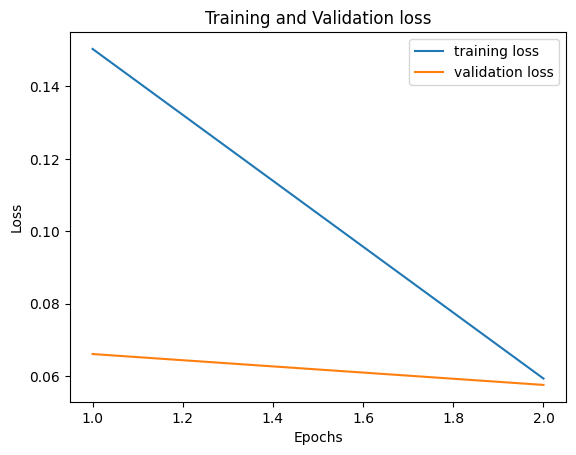

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

# REPORTING


In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
import numpy as np
from tqdm import tqdm


model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)
model.load_state_dict(torch.load(PATH_model))
model.to(device)

def evaluate_model(model, test_loader, device):
    model.eval()

    true_labels = []
    predicted_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [t.to(device) for t in batch]

            # Get model's predictions
            outputs = model(input_ids, attention_mask=attention_mask)
            predicted_probs_batch = torch.sigmoid(outputs.logits)  # Use sigmoid for multilabel classification
            predicted_probs.append(predicted_probs_batch.cpu().numpy())

            true_labels_batch = labels.cpu().numpy()
            true_labels.append(true_labels_batch)

    # Combine predictions and labels for evaluation
    true_labels = np.concatenate(true_labels, axis=0)
    predicted_probs = np.concatenate(predicted_probs, axis=0)
    predicted_labels = (predicted_probs > 0.5).astype(int)  # Apply threshold for binary classification

    # Calculate evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='micro')
    recall = recall_score(true_labels, predicted_labels, average='micro')

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

evaluate_model(model, test_loader, device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.9125
Precision: 0.7464
Recall: 0.7346


In [ ]:
def predict_user_input(input_text, model=model, tokenizer=tokenizer,device=device):
    user_input = [input_text]

    user_encodings = tokenizer(user_input, truncation=True, padding=True, return_tensors="pt")

    user_dataset = TensorDataset(user_encodings['input_ids'], user_encodings['attention_mask'])

    user_loader = DataLoader(user_dataset, batch_size=1, shuffle=False)

    model.eval()
    with torch.no_grad():
        for batch in user_loader:
            input_ids, attention_mask = [t.to(device) for t in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.sigmoid(logits)
    predicted_labels = (predictions.cpu().numpy() > 0.5).astype(int)

    label_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    predicted_labels_str = [label_names[i] for i in range(len(label_names)) if predicted_labels[0][i] == 1]
    if not predicted_labels_str:
            return ["Good comment"]
    return predicted_labels_str

In [ ]:
text = "fuck"
predict_user_input(input_text=text)

['toxic', 'obscene', 'insult']